In [ ]:
#Installing Required Packages
install.packages("corrplot")
install.packages("randomForest")
install.packages("caret")
install.packages("e1071")
install.packages("party")
install.packages("ggplot2")
install.packages("PerformanceAnalytics")

In [3]:
#Libraries required
library(corrplot) #For plotting correlation plots
library(PerformanceAnalytics) #For checking the performance Analysis of the desired features
library(randomForest) #For Random forest ML Algorithm
#library(mlbench) #Machine Learning Benchmark Problems:A collection of artificial and real-world machine learning benchmark problems, 
                 #including, e.g., several data sets from the UCI repository.
library(caret)   #(short for Classification And REgression Training, confusion Matrix) 
                 #contains functions to streamline the model training process for complex regression and classification problems.
library(e1071)   #For SVM for prediction, plots, tuning the hyperparameters 
library(party)   #For Decision Tree ML Algorithm
library(ggplot2) #For Data Visualization 

In [4]:
#Reading the dataset
data <- read.csv("data_with_na.csv")
data

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [5]:
#Finding the null values
summary(data) #Summary of Data


       id             diagnosis          radius_mean      texture_mean  
 Min.   :     8670   Length:569         Min.   : 6.981   Min.   : 9.71  
 1st Qu.:   869218   Class :character   1st Qu.:11.700   1st Qu.:16.17  
 Median :   906024   Mode  :character   Median :13.370   Median :18.84  
 Mean   : 30371831                      Mean   :14.127   Mean   :19.29  
 3rd Qu.:  8813129                      3rd Qu.:15.780   3rd Qu.:21.80  
 Max.   :911320502                      Max.   :28.110   Max.   :39.28  
                                                                        
 perimeter_mean     area_mean      smoothness_mean   compactness_mean 
 Min.   : 43.79   Min.   : 143.5   Min.   :0.05263   Min.   :0.01938  
 1st Qu.: 75.17   1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492  
 Median : 86.24   Median : 551.1   Median :0.09587   Median :0.09263  
 Mean   : 91.97   Mean   : 654.9   Mean   :0.09636   Mean   :0.10434  
 3rd Qu.:104.10   3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:

In [6]:
sum(is.na(data))#sum of Na values in the dataset



[1] 78

In [7]:
colSums(is.na(data)) #checking for na values columnwise


id               diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                      13 
    concave.points_mean           symmetry_mean  fractal_dimension_mean 
                     13                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave.points_se             symmetry_se 
                     13                      13                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave.points_worst 
                      0                      13                      13 
         symmetry_worst fractal_dimension_worst 
                      0                       0

In [8]:
rowSums(is.na(data)) #Row wise


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0
[482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0
[556] 0 0 6 0 0 0 6 0 0 0 0 0 0 6

In [9]:
table(is.na(data)) #Categorical representation of data


FALSE  TRUE 
18130    78 

In [10]:
# percentage of data missing in each column
perc = function(x){sum(is.na(x))/length(x)*100}


In [11]:
apply(data,2,perc)

id               diagnosis             radius_mean 
                0.00000                 0.00000                 0.00000 
           texture_mean          perimeter_mean               area_mean 
                0.00000                 0.00000                 0.00000 
        smoothness_mean        compactness_mean          concavity_mean 
                0.00000                 0.00000                 2.28471 
    concave.points_mean           symmetry_mean  fractal_dimension_mean 
                2.28471                 0.00000                 0.00000 
              radius_se              texture_se            perimeter_se 
                0.00000                 0.00000                 0.00000 
                area_se           smoothness_se          compactness_se 
                0.00000                 0.00000                 0.00000 
           concavity_se       concave.points_se             symmetry_se 
                2.28471                 2.28471                 0.00000 
   fractal_dimension_se            radius_worst           texture_worst 
                0.00000                 0.00000                 0.00000 
        perimeter_worst              area_worst        smoothness_worst 
                0.00000                 0.00000                 0.00000 
      compactness_worst         concavity_worst    concave.points_worst 
                0.00000                 2.28471                 2.28471 
         symmetry_worst fractal_dimension_worst 
                0.00000                 0.00000

# Columns Containing NA values


**For Concavity_mean**

In [12]:
sum(is.na(data$concavity_mean))

[1] 13

In [13]:
data$concavity_mean[is.na(data$concavity_mean)]=mean(data$concavity_mean,na.rm=T)

In [14]:
sum(is.na(data$concavity_mean))

[1] 0

In [15]:
data$concavity_mean

[1] 0.30010000 0.08690000 0.19740000 0.24140000 0.19800000 0.15780000
  [7] 0.11270000 0.09366000 0.18590000 0.22730000 0.03299000 0.09954000
 [13] 0.20650000 0.09938000 0.21280000 0.16390000 0.07395000 0.17220000
 [19] 0.14790000 0.06664000 0.04568000 0.02956000 0.20770000 0.10970000
 [25] 0.15250000 0.22290000 0.14250000 0.14900000 0.16830000 0.09875000
 [31] 0.23190000 0.12180000 0.24170000 0.16570000 0.13540000 0.13480000
 [37] 0.13190000 0.02562000 0.02398000 0.10630000 0.03110000 0.10440000
 [43] 0.21070000 0.09847000 0.08259000 0.19740000 0.01588000 0.12260000
 [49] 0.06592000 0.04751000 0.01657000 0.01857000 0.01972000 0.17720000
 [55] 0.05253000 0.03036000 0.13230000 0.12930000 0.00069200 0.02061000
 [61] 0.01084000 0.03000000 0.21350000 0.05988000 0.11280000 0.12670000
 [67] 0.02172000 0.03709000 0.31300000 0.03653000 0.10800000 0.08606000
 [73] 0.16920000 0.07789000 0.03372000 0.09769000 0.06877000 0.16840000
 [79] 0.37540000 0.03889000 0.04591000 0.11690000 0.33390000 0.19370000
 [85] 0.04151000 0.13350000 0.12040000 0.14680000 0.06015000 0.09966000
 [91] 0.03102000 0.11220000 0.03261000 0.03974000 0.17000000 0.14650000
 [97] 0.02490000 0.00682900 0.04196000 0.09388000 0.08625000 0.09087556
[103] 0.02383000 0.06154000 0.02995000 0.20710000 0.07070000 0.02643000
[109] 0.42640000 0.05133000 0.04334000 0.10650000 0.30030000 0.06476000
[115] 0.04132000 0.03328000 0.09263000 0.16900000 0.21330000 0.07293000
[121] 0.03512000 0.14570000 0.42680000 0.08842000 0.08092000 0.01420000
[127] 0.05285000 0.09271000 0.11380000 0.25450000 0.02855000 0.14660000
[133] 0.10430000 0.07135000 0.11530000 0.04711000 0.03592000 0.03503000
[139] 0.15390000 0.04635000 0.09087556 0.09447000 0.02031000 0.04894000
[145] 0.02251000 0.03710000 0.16590000 0.09050000 0.08487000 0.02881000
[151] 0.03136000 0.13210000 0.41080000 0.01982000 0.09293000 0.03885000
[157] 0.18550000 0.05150000 0.01972000 0.00309000 0.06843000 0.11930000
[163] 0.25080000 0.05370000 0.13240000 0.01947000 0.02531000 0.08422000
[169] 0.21590000 0.02602000 0.03987000 0.05858000 0.20320000 0.02363000
[175] 0.09087556 0.09087556 0.13070000 0.17930000 0.00159500 0.00919300
[181] 0.28710000 0.24870000 0.06593000 0.06181000 0.05375000 0.00159700
[187] 0.08169000 0.03809000 0.02353000 0.03844000 0.19810000 0.03112000
[193] 0.09087556 0.10850000 0.16970000 0.03873000 0.13850000 0.11030000
[199] 0.11140000 0.11800000 0.04187000 0.10360000 0.35230000 0.15580000
[205] 0.08005000 0.07550000 0.01756000 0.06950000 0.08705000 0.05892000
[211] 0.16400000 0.02669000 0.32010000 0.16820000 0.11150000 0.09901000
[217] 0.06636000 0.05774000 0.12720000 0.11450000 0.03888000 0.07860000
[223] 0.01768000 0.11470000 0.03554000 0.05724000 0.00664300 0.06505000
[229] 0.05438000 0.16950000 0.19100000 0.01633000 0.00496700 0.15540000
[235] 0.01652000 0.01462000 0.19500000 0.09042000 0.11030000 0.14170000
[241] 0.04705000 0.01053000 0.15480000 0.04697000 0.20490000 0.04831000
[247] 0.04336000 0.13740000 0.02379000 0.04328000 0.27120000 0.02638000
[253] 0.24170000 0.12660000 0.13790000 0.09789000 0.17840000 0.24480000
[259] 0.31760000 0.17510000 0.15190000 0.02891000 0.09697000 0.04209000
[265] 0.09061000 0.13670000 0.06387000 0.04072000 0.03900000 0.08448000
[271] 0.00725000 0.03265000 0.21950000 0.01103000 0.05699000 0.05929000
[277] 0.00148700 0.08020000 0.01997000 0.04479000 0.19210000 0.02245000
[283] 0.16260000 0.19480000 0.11150000 0.00186000 0.06574000 0.02260000
[289] 0.09274000 0.02399000 0.13620000 0.05940000 0.06155000 0.02688000
[295] 0.01288000 0.01063000 0.01236000 0.02685000 0.02475000 0.02495000
[301] 0.21970000 0.06830000 0.22830000 0.02297000 0.03344000 0.01974000
[307] 0.00146100 0.00368100 0.00275800 0.00455900 0.01583000 0.01447000
[313] 0.04052000 0.01367000 0.09087556 0.00447300 0.01123000 0.11300000
[319] 0.19750000 0.01342000 0.06726000 0.11550000 0.03800000 0.25650000
[325] 0.01994000 0.03193000 0.01765000 0.00154600 0.14780000 0.17990000
[331] 0.12040000 0.07107000 0.00500600 0.0

In [16]:
sum(is.na(data)) #78-13= 65

[1] 65

**For Concave.points_mean**

In [17]:
sum(is.na(data$concave.points_mean))

[1] 13

In [18]:
data$concave.points_mean[is.na(data$concave.points_mean)]=mean(data$concave.points_mean,na.rm=T)

In [19]:
sum(is.na(data$concavity_mean))

[1] 0

In [20]:
data$concavity_mean

[1] 0.30010000 0.08690000 0.19740000 0.24140000 0.19800000 0.15780000
  [7] 0.11270000 0.09366000 0.18590000 0.22730000 0.03299000 0.09954000
 [13] 0.20650000 0.09938000 0.21280000 0.16390000 0.07395000 0.17220000
 [19] 0.14790000 0.06664000 0.04568000 0.02956000 0.20770000 0.10970000
 [25] 0.15250000 0.22290000 0.14250000 0.14900000 0.16830000 0.09875000
 [31] 0.23190000 0.12180000 0.24170000 0.16570000 0.13540000 0.13480000
 [37] 0.13190000 0.02562000 0.02398000 0.10630000 0.03110000 0.10440000
 [43] 0.21070000 0.09847000 0.08259000 0.19740000 0.01588000 0.12260000
 [49] 0.06592000 0.04751000 0.01657000 0.01857000 0.01972000 0.17720000
 [55] 0.05253000 0.03036000 0.13230000 0.12930000 0.00069200 0.02061000
 [61] 0.01084000 0.03000000 0.21350000 0.05988000 0.11280000 0.12670000
 [67] 0.02172000 0.03709000 0.31300000 0.03653000 0.10800000 0.08606000
 [73] 0.16920000 0.07789000 0.03372000 0.09769000 0.06877000 0.16840000
 [79] 0.37540000 0.03889000 0.04591000 0.11690000 0.33390000 0.19370000
 [85] 0.04151000 0.13350000 0.12040000 0.14680000 0.06015000 0.09966000
 [91] 0.03102000 0.11220000 0.03261000 0.03974000 0.17000000 0.14650000
 [97] 0.02490000 0.00682900 0.04196000 0.09388000 0.08625000 0.09087556
[103] 0.02383000 0.06154000 0.02995000 0.20710000 0.07070000 0.02643000
[109] 0.42640000 0.05133000 0.04334000 0.10650000 0.30030000 0.06476000
[115] 0.04132000 0.03328000 0.09263000 0.16900000 0.21330000 0.07293000
[121] 0.03512000 0.14570000 0.42680000 0.08842000 0.08092000 0.01420000
[127] 0.05285000 0.09271000 0.11380000 0.25450000 0.02855000 0.14660000
[133] 0.10430000 0.07135000 0.11530000 0.04711000 0.03592000 0.03503000
[139] 0.15390000 0.04635000 0.09087556 0.09447000 0.02031000 0.04894000
[145] 0.02251000 0.03710000 0.16590000 0.09050000 0.08487000 0.02881000
[151] 0.03136000 0.13210000 0.41080000 0.01982000 0.09293000 0.03885000
[157] 0.18550000 0.05150000 0.01972000 0.00309000 0.06843000 0.11930000
[163] 0.25080000 0.05370000 0.13240000 0.01947000 0.02531000 0.08422000
[169] 0.21590000 0.02602000 0.03987000 0.05858000 0.20320000 0.02363000
[175] 0.09087556 0.09087556 0.13070000 0.17930000 0.00159500 0.00919300
[181] 0.28710000 0.24870000 0.06593000 0.06181000 0.05375000 0.00159700
[187] 0.08169000 0.03809000 0.02353000 0.03844000 0.19810000 0.03112000
[193] 0.09087556 0.10850000 0.16970000 0.03873000 0.13850000 0.11030000
[199] 0.11140000 0.11800000 0.04187000 0.10360000 0.35230000 0.15580000
[205] 0.08005000 0.07550000 0.01756000 0.06950000 0.08705000 0.05892000
[211] 0.16400000 0.02669000 0.32010000 0.16820000 0.11150000 0.09901000
[217] 0.06636000 0.05774000 0.12720000 0.11450000 0.03888000 0.07860000
[223] 0.01768000 0.11470000 0.03554000 0.05724000 0.00664300 0.06505000
[229] 0.05438000 0.16950000 0.19100000 0.01633000 0.00496700 0.15540000
[235] 0.01652000 0.01462000 0.19500000 0.09042000 0.11030000 0.14170000
[241] 0.04705000 0.01053000 0.15480000 0.04697000 0.20490000 0.04831000
[247] 0.04336000 0.13740000 0.02379000 0.04328000 0.27120000 0.02638000
[253] 0.24170000 0.12660000 0.13790000 0.09789000 0.17840000 0.24480000
[259] 0.31760000 0.17510000 0.15190000 0.02891000 0.09697000 0.04209000
[265] 0.09061000 0.13670000 0.06387000 0.04072000 0.03900000 0.08448000
[271] 0.00725000 0.03265000 0.21950000 0.01103000 0.05699000 0.05929000
[277] 0.00148700 0.08020000 0.01997000 0.04479000 0.19210000 0.02245000
[283] 0.16260000 0.19480000 0.11150000 0.00186000 0.06574000 0.02260000
[289] 0.09274000 0.02399000 0.13620000 0.05940000 0.06155000 0.02688000
[295] 0.01288000 0.01063000 0.01236000 0.02685000 0.02475000 0.02495000
[301] 0.21970000 0.06830000 0.22830000 0.02297000 0.03344000 0.01974000
[307] 0.00146100 0.00368100 0.00275800 0.00455900 0.01583000 0.01447000
[313] 0.04052000 0.01367000 0.09087556 0.00447300 0.01123000 0.11300000
[319] 0.19750000 0.01342000 0.06726000 0.11550000 0.03800000 0.25650000
[325] 0.01994000 0.03193000 0.01765000 0.00154600 0.14780000 0.17990000
[331] 0.12040000 0.07107000 0.00500600 0.0

In [21]:
sum(is.na(data)) #65-13=52

[1] 52

**For Concavity_se**

In [22]:
sum(is.na(data$concavity_se))



[1] 13

In [23]:
data$concavity_se[is.na(data$concavity_se)]=mean(data$concavity_se,na.rm=T)


In [24]:
sum(is.na(data$concavity_se))


[1] 0

In [25]:
data$concavity_se


[1] 0.05373000 0.01860000 0.03832000 0.05661000 0.05688000 0.03672000
  [7] 0.02254000 0.02488000 0.03553000 0.07743000 0.01101000 0.02791000
 [13] 0.08890000 0.05051000 0.05501000 0.04741000 0.01998000 0.03188000
 [19] 0.03391000 0.02387000 0.01698000 0.01985000 0.06446000 0.01715000
 [25] 0.02741000 0.03732000 0.02681000 0.05081000 0.03576000 0.03407000
 [31] 0.05196000 0.04205000 0.05042000 0.03497000 0.02664000 0.03695000
 [37] 0.04815000 0.01343000 0.01818000 0.03049000 0.01390000 0.02595000
 [43] 0.09723000 0.02185000 0.01452000 0.05554000 0.01588000 0.02905000
 [49] 0.02322000 0.02095000 0.01168000 0.01079000 0.01311000 0.02817000
 [55] 0.01603000 0.01349000 0.02945000 0.02572000 0.00069200 0.01981000
 [61] 0.00766500 0.03000000 0.06899000 0.04312000 0.02973000 0.02315000
 [67] 0.01714000 0.02063000 0.30380000 0.01585000 0.02269000 0.05671000
 [73] 0.04252000 0.01759000 0.01826000 0.03500000 0.01162000 0.04658000
 [79] 0.10910000 0.02071000 0.02586000 0.03980000 0.05730000 0.02134000
 [85] 0.02007000 0.02806000 0.05371000 0.03710000 0.02703000 0.04436000
 [91] 0.01121000 0.04531000 0.01358000 0.01872000 0.04867000 0.04232000
 [97] 0.01131000 0.00530800 0.01693000 0.03321000 0.02647000 0.03263943
[103] 0.01069000 0.03029000 0.02880000 0.05473000 0.02945000 0.01167000
[109] 0.10400000 0.02443000 0.02722000 0.05101000 0.14350000 0.04591000
[115] 0.03259000 0.01835000 0.09263000 0.03011000 0.05950000 0.02291000
[121] 0.01514000 0.03342000 0.12780000 0.02882000 0.04957000 0.00912700
[127] 0.01796000 0.04040000 0.03204000 0.04755000 0.01018000 0.02813000
[133] 0.02219000 0.01678000 0.02855000 0.02332000 0.02662000 0.01434000
[139] 0.06577000 0.02187000 0.03263943 0.03067000 0.01158000 0.01510000
[145] 0.02018000 0.02789000 0.04649000 0.05303000 0.03114000 0.01780000
[151] 0.01949000 0.07753000 0.39600000 0.01196000 0.03047000 0.01994000
[157] 0.05206000 0.03056000 0.00834200 0.00183500 0.04167000 0.04344000
[163] 0.04029000 0.03125000 0.02822000 0.00826800 0.01099000 0.02626000
[169] 0.04644000 0.00727600 0.01683000 0.02151000 0.04303000 0.01453000
[175] 0.03263943 0.03263943 0.11970000 0.05371000 0.00159500 0.00618000
[181] 0.03109000 0.03872000 0.01954000 0.05915000 0.01774000 0.00159700
[187] 0.01412000 0.01978000 0.01556000 0.02117000 0.11660000 0.02176000
[193] 0.03263943 0.03763000 0.05551000 0.02321000 0.04665000 0.06110000
[199] 0.02706000 0.02000000 0.01401000 0.02713000 0.08958000 0.03112000
[205] 0.02701000 0.02039000 0.00797500 0.01946000 0.02526000 0.01841000
[211] 0.05489000 0.02045000 0.06389000 0.14380000 0.03688000 0.03909000
[217] 0.05946000 0.05774000 0.03446000 0.02664000 0.01652000 0.02544000
[223] 0.00853400 0.02384000 0.02259000 0.02360000 0.00281700 0.03644000
[229] 0.03016000 0.04683000 0.03055000 0.01633000 0.00322300 0.03457000
[235] 0.01186000 0.00730200 0.04497000 0.04257000 0.03850000 0.02602000
[241] 0.01810000 0.00649300 0.08880000 0.03371000 0.03915000 0.01865000
[247] 0.03079000 0.08158000 0.01081000 0.02105000 0.09518000 0.01245000
[253] 0.06800000 0.02332000 0.02749000 0.03119000 0.03863000 0.04983000
[259] 0.08232000 0.02889000 0.02117000 0.01246000 0.04638000 0.01311000
[265] 0.02048000 0.02143000 0.03354000 0.03099000 0.02589000 0.07339000
[271] 0.00482600 0.01282000 0.06329000 0.00834700 0.01622000 0.01267000
[277] 0.00148700 0.02623000 0.01065000 0.01457000 0.03988000 0.01514000
[283] 0.03059000 0.03872000 0.07927000 0.00186000 0.04387000 0.01652000
[289] 0.08099000 0.01376000 0.09960000 0.01536000 0.02335000 0.01412000
[295] 0.00656400 0.00427200 0.01072000 0.01272000 0.01079000 0.01861000
[301] 0.05638000 0.04712000 0.07649000 0.01808000 0.02221000 0.01596000
[307] 0.00112800 0.00368100 0.00203000 0.00283100 0.01042000 0.00532500
[313] 0.03137000 0.01003000 0.03263943 0.00262000 0.01123000 0.02408000
[319] 0.10270000 0.00995900 0.04004000 0.02645000 0.01902000 0.03190000
[325] 0.01051000 0.01329000 0.00571700 0.00118400 0.03248000 0.05839000
[331] 0.03715000 0.04393000 0.00329700 0.0

In [26]:
sum(is.na(data)) #52-13=39

[1] 39

**For Concave.points_se**

In [27]:
sum(is.na(data$concave.points_se))


[1] 13

In [28]:
data$concave.points_se[is.na(data$concave.points_se)]=mean(data$concave.points_se,na.rm=T)


In [29]:
sum(is.na(data$concave.points_se))


[1] 0

In [30]:
data$concave.points_se


[1] 0.01587000 0.01340000 0.02058000 0.01867000 0.01885000 0.01137000
  [7] 0.01039000 0.01448000 0.01226000 0.01432000 0.00759100 0.01282000
 [13] 0.04090000 0.01992000 0.01628000 0.01090000 0.01109000 0.01297000
 [19] 0.01521000 0.01315000 0.00649000 0.01421000 0.02252000 0.01038000
 [25] 0.01130000 0.02397000 0.01352000 0.01911000 0.01083000 0.01354000
 [31] 0.01158000 0.01044000 0.01112000 0.00964300 0.00906700 0.01195000
 [37] 0.01161000 0.01164000 0.01917000 0.01262000 0.00688100 0.01037000
 [43] 0.02638000 0.00956000 0.00685300 0.01695000 0.00591700 0.01215000
 [49] 0.00566000 0.01184000 0.00744500 0.00795600 0.00800000 0.00922200
 [55] 0.00922200 0.00867000 0.01538000 0.01272000 0.00416700 0.00574200
 [61] 0.00819300 0.00925900 0.01848000 0.01560000 0.01290000 0.01184000
 [67] 0.00933300 0.00896500 0.03322000 0.00866200 0.01370000 0.01766000
 [73] 0.01127000 0.00920600 0.00796500 0.01809000 0.00823900 0.02070000
 [79] 0.02593000 0.00817900 0.00750600 0.01383000 0.02030000 0.01843000
 [85] 0.00702700 0.01420000 0.01761000 0.01200000 0.01293000 0.01623000
 [91] 0.00860600 0.01763000 0.01082000 0.00936600 0.01851000 0.01269000
 [97] 0.01519000 0.00525000 0.00688400 0.01424000 0.00992100 0.01207195
[103] 0.00679700 0.01112000 0.00861400 0.01388000 0.01398000 0.00555800
[109] 0.02480000 0.00643500 0.01023000 0.02295000 0.02292000 0.01544000
[115] 0.01040000 0.00771100 0.02308000 0.01271000 0.01390000 0.00986300
[121] 0.00646000 0.01601000 0.01822000 0.01200000 0.01038000 0.00481400
[127] 0.00688000 0.01361000 0.02258000 0.01043000 0.00809400 0.01093000
[133] 0.00923100 0.01268000 0.00914800 0.00892000 0.01307000 0.00860200
[139] 0.02801000 0.01965000 0.01207195 0.01167000 0.00952000 0.00758400
[145] 0.00561200 0.01110000 0.01843000 0.01527000 0.01493000 0.00582800
[151] 0.01153000 0.01022000 0.05279000 0.00823200 0.00953600 0.00792400
[157] 0.01841000 0.01110000 0.00627300 0.00357600 0.01152000 0.02794000
[163] 0.01303000 0.01135000 0.01623000 0.00643200 0.00534400 0.01604000
[169] 0.01569000 0.00907300 0.01241000 0.00944300 0.01320000 0.01583000
[175] 0.01207195 0.01207195 0.02460000 0.01813000 0.00185200 0.00740800
[181] 0.01241000 0.01567000 0.00976700 0.01712000 0.00600900 0.00240400
[187] 0.00671900 0.01185000 0.00624000 0.00643300 0.01666000 0.01757000
[193] 0.01207195 0.01321000 0.01883000 0.00842000 0.02060000 0.01444000
[199] 0.01221000 0.00730300 0.01140000 0.01345000 0.02465000 0.01291000
[205] 0.01037000 0.00826000 0.00752700 0.01123000 0.00830400 0.00737300
[211] 0.02765000 0.00674700 0.01407000 0.03927000 0.01627000 0.01435000
[217] 0.01785000 0.01071000 0.01712000 0.01078000 0.00665900 0.00836000
[223] 0.00762400 0.00863700 0.00905700 0.01286000 0.00497200 0.01155000
[229] 0.00869100 0.01499000 0.01384000 0.00312500 0.00341900 0.01091000
[235] 0.00962300 0.01004000 0.01716000 0.01671000 0.01011000 0.01374000
[241] 0.01103000 0.00376200 0.01314000 0.01007000 0.01559000 0.01133000
[247] 0.00538300 0.01370000 0.00624500 0.01006000 0.01864000 0.00917500
[253] 0.01971000 0.01262000 0.01267000 0.01342000 0.01519000 0.02127000
[259] 0.03024000 0.01022000 0.00818500 0.00767100 0.02149000 0.00517400
[265] 0.00987500 0.00928000 0.01365000 0.00991900 0.00633000 0.01745000
[271] 0.00360800 0.00884900 0.01561000 0.00947200 0.00852200 0.01910000
[277] 0.00333300 0.01463000 0.00504400 0.01043000 0.01293000 0.01846000
[283] 0.01499000 0.01209000 0.01774000 0.00292400 0.01633000 0.00590500
[289] 0.03487000 0.00992400 0.02771000 0.01187000 0.01132000 0.00857800
[295] 0.00797800 0.00682900 0.00939300 0.01432000 0.00524300 0.01250000
[301] 0.01733000 0.01403000 0.01936000 0.00919900 0.00780700 0.00699800
[307] 0.00238600 0.00347200 0.00324200 0.00482100 0.00763800 0.00632400
[313] 0.01069000 0.00466700 0.01207195 0.00339000 0.00505100 0.01143000
[319] 0.02527000 0.01120000 0.01544000 0.01247000 0.01011000 0.01369000
[325] 0.00514200 0.00647400 0.00662700 0.00395100 0.01392000 0.01186000
[331] 0.01459000 0.00981100 0.00496700 0.0

In [31]:
sum(is.na(data)) #39-13=26

[1] 26

**For concavity_worst**

In [32]:
sum(is.na(data$concavity_worst))
data$concavity_worst[is.na(data$concavity_worst)]=mean(data$concavity_worst,na.rm=T)
sum(is.na(data$concavity_worst))
data$concavity_worst
sum(is.na(data)) #26-13=13

[1] 13

[1] 0

[1] 0.7119000 0.2416000 0.4504000 0.6869000 0.4000000 0.5355000 0.3784000
  [8] 0.2678000 0.5390000 1.1050000 0.1459000 0.3965000 0.3639000 0.2322000
 [15] 0.6943000 0.7026000 0.2914000 0.4784000 0.5372000 0.2390000 0.1890000
 [22] 0.0886700 0.6305000 0.3155000 0.4695000 0.3853000 0.5539000 0.3446000
 [29] 0.6335000 0.2489000 0.6133000 0.6956000 0.5588000 0.6091000 0.5274000
 [36] 0.5409000 0.5186000 0.0483300 0.0239800 0.5030000 0.2085000 0.4023000
 [43] 0.7242000 0.3664000 0.3728000 0.7345000 0.0688000 0.5006000 0.3050000
 [50] 0.2282000 0.0552300 0.1050000 0.0920300 0.2623000 0.2712000 0.0907600
 [57] 0.3879000 0.3587000 0.0018450 0.1168000 0.0216800 0.0900100 0.6922000
 [64] 0.1397000 0.4024000 0.3024000 0.0941200 0.1444000 1.2520000 0.1039000
 [71] 0.2687000 0.1434000 0.6566000 0.2779000 0.1703000 0.2829000 0.0853900
 [78] 0.3786000 0.7681000 0.1731000 0.1755000 0.4858000 0.6476000 0.2432000
 [85] 0.2267000 0.3157000 0.3349000 0.5755000 0.2434000 0.2604000 0.0918900
 [92] 0.2846000 0.1350000 0.1381000 0.5203000 0.4098000 0.0498000 0.0204900
 [99] 0.1922000 0.3194000 0.3169000 0.2785526 0.1145000 0.2644000 0.0798700
[106] 0.6376000 0.2873000 0.1937000 0.9608000 0.3120000 0.1300000 0.2216000
[113] 0.6783000 0.1295000 0.2456000 0.1503000 0.1544000 0.4704000 0.7356000
[120] 0.2249000 0.2102000 0.3272000 0.5803000 0.2560000 0.3308000 0.0811500
[127] 0.3796000 0.3207000 0.1960000 0.5673000 0.0991500 0.3791000 0.2992000
[134] 0.1709000 0.3965000 0.2177000 0.1046000 0.1399000 0.3355000 0.0866900
[141] 0.2785526 0.2802000 0.0770800 0.2090000 0.0975500 0.0942000 0.4504000
[148] 0.2500000 0.3103000 0.1564000 0.0811200 0.5381000 0.8216000 0.0711600
[155] 0.3009000 0.1943000 0.3583000 0.1882000 0.0863600 0.0185400 0.1956000
[162] 0.2264000 0.6810000 0.1688000 0.3948000 0.0775000 0.1047000 0.2318000
[169] 0.4890000 0.0664800 0.1242000 0.2644000 0.5830000 0.0393800 0.2785526
[176] 0.2785526 0.3486000 0.5862000 0.0079770 0.0275800 0.5340000 0.6780000
[183] 0.2902000 0.1648000 0.3630000 0.0069200 0.3538000 0.1521000 0.0880300
[190] 0.1423000 0.8488000 0.0518600 0.2785526 0.4425000 0.4589000 0.1764000
[197] 0.3809000 0.2535000 0.3865000 0.4967000 0.1377000 0.3508000 0.7892000
[204] 0.4646000 0.2671000 0.3327000 0.0621300 0.1932000 0.3162000 0.2962000
[211] 0.3861000 0.1471000 0.3201000 0.2803000 0.3744000 0.4636000 0.2806000
[218] 0.1925000 0.3617000 0.3995000 0.1759000 0.2577000 0.0657200 0.3976000
[225] 0.1786000 0.1632000 0.0263900 0.3402000 0.3911000 0.6282000 0.5018000
[232] 0.1089000 0.0231800 0.4146000 0.0716100 0.0623100 0.5820000 0.3158000
[239] 0.3064000 0.3241000 0.1533000 0.0624300 0.7436000 0.1359000 0.3458000
[246] 0.1181000 0.2298000 0.7727000 0.1125000 0.1804000 0.6991000 0.0810500
[253] 0.8489000 0.3378000 0.4317000 0.3209000 0.4251000 0.4429000 0.6181000
[260] 0.5703000 0.3788000 0.1211000 0.2298000 0.2260000 0.3889000 0.3442000
[267] 0.1916000 0.1453000 0.1992000 0.2534000 0.0386600 0.1275000 0.5807000
[274] 0.0404300 0.2080000 0.0715300 0.0049550 0.2210000 0.1060000 0.1456000
[281] 0.5754000 0.0673500 0.4316000 0.5026000 0.3344000 0.0055790 0.2365000
[288] 0.1186000 0.1546000 0.0752900 0.2220000 0.1804000 0.2241000 0.1316000
[295] 0.0523300 0.0373200 0.0288400 0.0612000 0.1565000 0.0415800 0.6121000
[302] 0.1904000 0.4932000 0.0842300 0.1226000 0.0723900 0.0112000 0.0147200
[309] 0.0137900 0.0182400 0.0791500 0.0474600 0.1769000 0.0832400 0.2785526
[316] 0.0193800 0.0411600 0.3853000 0.4609000 0.0223700 0.1898000 0.2606000
[323] 0.1791000 0.5344000 0.1167000 0.1020000 0.0530700 0.0077320 0.3597000
[330] 0.3344000 0.4956000 0.3439000 0.0133500 0.0055180 0.0361900 0.3920000
[337] 0.1450000 0.4634000 0.1055000 0.4819000 0.3755000 0.4341000 0.2299000
[344] 0.4734000 0.1087000 0.0716200 0.0450600 0.2151000 0.0982300 0.0312200
[351] 0.0304600 0.6872000 0.6451000 0.4029000 0.1201000 0.2388000 0.2573000
[358] 0.0528500 0.0944100 0.1144000 0.0035810 0.1212000 0.1255000 0.1663000
[365] 0.1364000 0.2702000 0.3703000 0.2413000 0.28

[1] 13

**For concave.points_worst**

In [33]:
sum(is.na(data$concave.points_worst))
data$concave.points_worst[is.na(data$concave.points_worst)]=mean(data$concave.points_worst,na.rm=T)
sum(is.na(data$concave.points_worst))
data$concave.points_worst
sum(is.na(data)) #13-13=0

[1] 13

[1] 0

[1] 0.2654000 0.1860000 0.2430000 0.2575000 0.1625000 0.1741000 0.1932000
  [8] 0.1556000 0.2060000 0.2210000 0.0997500 0.1810000 0.1767000 0.1119000
 [15] 0.2208000 0.1712000 0.1609000 0.2073000 0.2388000 0.1288000 0.0728300
 [22] 0.0622700 0.2393000 0.2009000 0.2095000 0.2550000 0.2701000 0.1490000
 [29] 0.2024000 0.1456000 0.1848000 0.1546000 0.1847000 0.1785000 0.1864000
 [36] 0.1813000 0.1447000 0.0501300 0.0289900 0.2258000 0.1112000 0.1424000
 [43] 0.2493000 0.1492000 0.1607000 0.2378000 0.0256400 0.2088000 0.0654800
 [50] 0.1282000 0.0371500 0.0858600 0.0629600 0.1325000 0.1530000 0.0631600
 [57] 0.2091000 0.1834000 0.0111100 0.0441900 0.0257900 0.0277800 0.1785000
 [64] 0.0508700 0.1716000 0.1614000 0.0651700 0.0696100 0.1750000 0.0588200
 [71] 0.1789000 0.0478600 0.1899000 0.1383000 0.0866000 0.1520000 0.0740700
 [78] 0.2102000 0.2508000 0.0792600 0.0612700 0.1708000 0.2867000 0.1841000
 [85] 0.0763200 0.1642000 0.1225000 0.1956000 0.1205000 0.1397000 0.0694600
 [92] 0.1476000 0.1001000 0.0791100 0.2115000 0.1573000 0.0588200 0.0238100
 [99] 0.0844900 0.1565000 0.1184000 0.1172859 0.0743100 0.0974900 0.0320300
[106] 0.1986000 0.1218000 0.0844200 0.2910000 0.0827800 0.0533400 0.1105000
[113] 0.1505000 0.0613600 0.1050000 0.0724700 0.0384600 0.2027000 0.2034000
[120] 0.1185000 0.0895800 0.1674000 0.2248000 0.1221000 0.0897800 0.0510400
[127] 0.1329000 0.1218000 0.1423000 0.1732000 0.0818700 0.1514000 0.1312000
[134] 0.1374000 0.1379000 0.0933100 0.0696800 0.0847600 0.1667000 0.0861100
[141] 0.1172859 0.1216000 0.0640200 0.1012000 0.0341300 0.0604200 0.1865000
[148] 0.0840500 0.1599000 0.0601900 0.0629600 0.0787900 0.1571000 0.0550600
[155] 0.0972200 0.0821100 0.1515000 0.0843600 0.0702500 0.0395300 0.0790900
[162] 0.1777000 0.2247000 0.0819400 0.2346000 0.0575400 0.0460300 0.1474000
[169] 0.1721000 0.0848500 0.0939100 0.1160000 0.1827000 0.0430600 0.1172859
[176] 0.1172859 0.0991000 0.2035000 0.0092590 0.0399000 0.2688000 0.2903000
[183] 0.1541000 0.0629600 0.1226000 0.0104200 0.1571000 0.1099000 0.0430600
[190] 0.0481500 0.1772000 0.0477300 0.1172859 0.1459000 0.1727000 0.0823500
[197] 0.1673000 0.0918100 0.1708000 0.1838000 0.1080000 0.1939000 0.2733000
[204] 0.2013000 0.1015000 0.1252000 0.0558800 0.1096000 0.1126000 0.1035000
[211] 0.1920000 0.0691300 0.1595000 0.1099000 0.1772000 0.1654000 0.1138000
[218] 0.0357100 0.1820000 0.1625000 0.0805600 0.0909000 0.0557500 0.1479000
[225] 0.0967800 0.1087000 0.0446400 0.1379000 0.1180000 0.1977000 0.2543000
[232] 0.0208300 0.0300200 0.1563000 0.0722200 0.0796300 0.2593000 0.1445000
[239] 0.0821900 0.2066000 0.0922200 0.0405200 0.1218000 0.0610600 0.1564000
[246] 0.0673600 0.0497000 0.1561000 0.0613600 0.0960800 0.2105000 0.0654400
[253] 0.2507000 0.1857000 0.1999000 0.1374000 0.1941000 0.2229000 0.2462000
[260] 0.2014000 0.1697000 0.0823500 0.1528000 0.0856800 0.1984000 0.1659000
[267] 0.0792600 0.0618900 0.0578000 0.0860000 0.0333300 0.0875000 0.1841000
[274] 0.0515900 0.1136000 0.0894600 0.0111100 0.1294000 0.0518500 0.0999300
[281] 0.1872000 0.0829000 0.2252000 0.1732000 0.1017000 0.0087720 0.1155000
[288] 0.0536600 0.0931400 0.0620300 0.1021000 0.1489000 0.1056000 0.0914000
[295] 0.0634300 0.0580200 0.0319400 0.0716000 0.0753000 0.0312500 0.1980000
[302] 0.0762500 0.1923000 0.0652800 0.0550900 0.0481500 0.0250000 0.0138900
[309] 0.0221000 0.0353200 0.0574100 0.0581300 0.0841100 0.0471500 0.1172859
[316] 0.0278400 0.0185200 0.1776000 0.1145000 0.0283200 0.0974400 0.1425000
[323] 0.1155000 0.2685000 0.0555600 0.0560200 0.0589000 0.0279600 0.1583000
[330] 0.1047000 0.1981000 0.0985800 0.0202200 0.0166700 0.0398300 0.1827000
[337] 0.0585000 0.2048000 0.0649900 0.2089000 0.1414000 0.0812000 0.1075000
[344] 0.2255000 0.0786400 0.0407400 0.0509300 0.1251000 0.0654800 0.0476600
[351] 0.0426200 0.2135000 0.2756000 0.1526000 0.0392200 0.0926500 0.1258000
[358] 0.0555600 0.0476200 0.0505200 0.0163500 0.0561400 0.0831200 0.0912300
[365] 0.0698700 0.1765000 0.2152000 0.0882900 0.18

[1] 0

**Removing unwanted features from the df**

In [34]:

data$id <- NULL

In [35]:
data

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [36]:
data$diagnosis <- factor(ifelse(data$diagnosis=="B","Benign","Malignant"))
colnames(data)
data

[1] "diagnosis"               "radius_mean"            
 [3] "texture_mean"            "perimeter_mean"         
 [5] "area_mean"               "smoothness_mean"        
 [7] "compactness_mean"        "concavity_mean"         
 [9] "concave.points_mean"     "symmetry_mean"          
[11] "fractal_dimension_mean"  "radius_se"              
[13] "texture_se"              "perimeter_se"           
[15] "area_se"                 "smoothness_se"          
[17] "compactness_se"          "concavity_se"           
[19] "concave.points_se"       "symmetry_se"            
[21] "fractal_dimension_se"    "radius_worst"           
[23] "texture_worst"           "perimeter_worst"        
[25] "area_worst"              "smoothness_worst"       
[27] "compactness_worst"       "concavity_worst"        
[29] "concave.points_worst"    "symmetry_worst"         
[31] "fractal_dimension_worst"

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Malignant,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
Malignant,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
Malignant,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
Malignant,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
Malignant,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
Malignant,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
Malignant,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
Malignant,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
Malignant,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


# Data Exploration

In [37]:
dim(data) #checking of Dimensions (569-Rows and 31-columns)


[1] 569  31

In [38]:
str(data) #Structure of Dataset


'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 

In [39]:
summary(data) #Summary of dataset


     diagnosis    radius_mean      texture_mean   perimeter_mean  
 Benign   :357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Malignant:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
                 Median :13.370   Median :18.84   Median : 86.24  
                 Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                 3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                 Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean    
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.000692  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.031360  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.066640  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.090876  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.130700  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.426800  
 concave.points_mean

In [40]:
attributes(data) #Checking the attributes in dataset 

$names
 [1] "diagnosis"               "radius_mean"            
 [3] "texture_mean"            "perimeter_mean"         
 [5] "area_mean"               "smoothness_mean"        
 [7] "compactness_mean"        "concavity_mean"         
 [9] "concave.points_mean"     "symmetry_mean"          
[11] "fractal_dimension_mean"  "radius_se"              
[13] "texture_se"              "perimeter_se"           
[15] "area_se"                 "smoothness_se"          
[17] "compactness_se"          "concavity_se"           
[19] "concave.points_se"       "symmetry_se"            
[21] "fractal_dimension_se"    "radius_worst"           
[23] "texture_worst"           "perimeter_worst"        
[25] "area_worst"              "smoothness_worst"       
[27] "compactness_worst"       "concavity_worst"        
[29] "concave.points_worst"    "symmetry_worst"         
[31] "fractal_dimension_worst"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
[253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
[271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
[289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
[307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
[325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
[343] 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
[361] 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
[379] 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
[397] 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
[415] 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
[433] 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
[451] 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
[469] 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
[487] 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504
[505] 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522
[523] 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
[541] 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558
[559] 559 560 561 562 563 564 565 566 567 568 569

$class
[1] "data.frame"

In [41]:
quantile(data$radius_mean) #for calculating various quantiles of the distribution


0%    25%    50%    75%   100% 
 6.981 11.700 13.370 15.780 28.110

In [42]:
quantile(data$radius_mean, c(.1,.3,.7))

10%    30%    70% 
10.260 12.012 15.056

In [43]:
var(data$radius_mean)  #variance 

[1] 12.41892

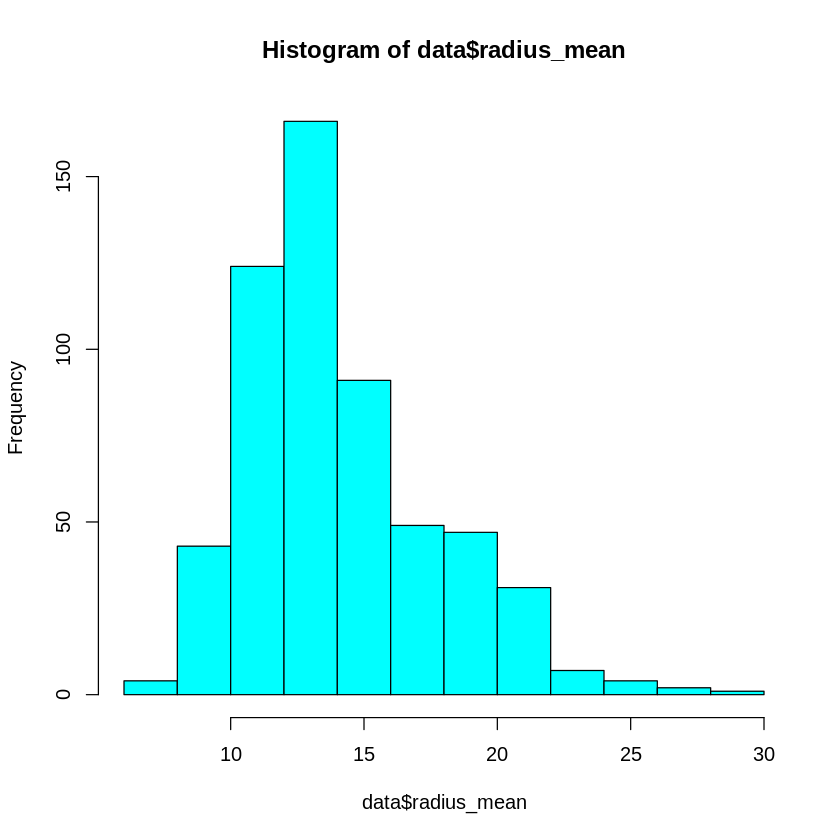

In [44]:
hist(data$radius_mean, col= "cyan") #plotting a histogram

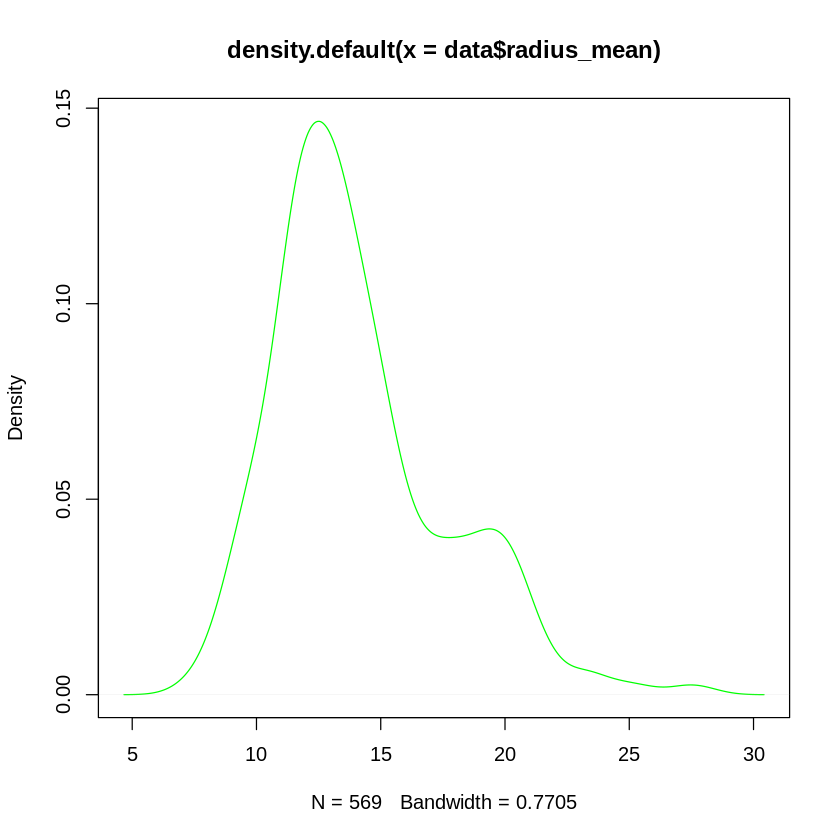

In [45]:
plot(density(data$radius_mean),col = 'green') #plotting a graph of data$radius_mean

In [46]:
t = table(data$diagnosis) 
t #No of Benign and Malignant


   Benign Malignant 
      357       212 

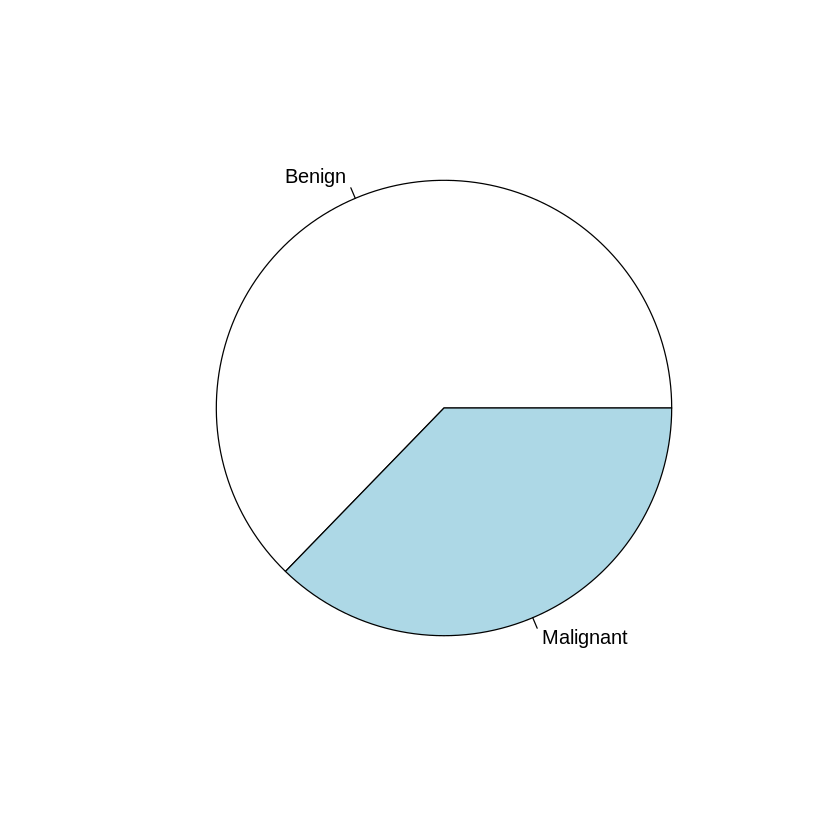

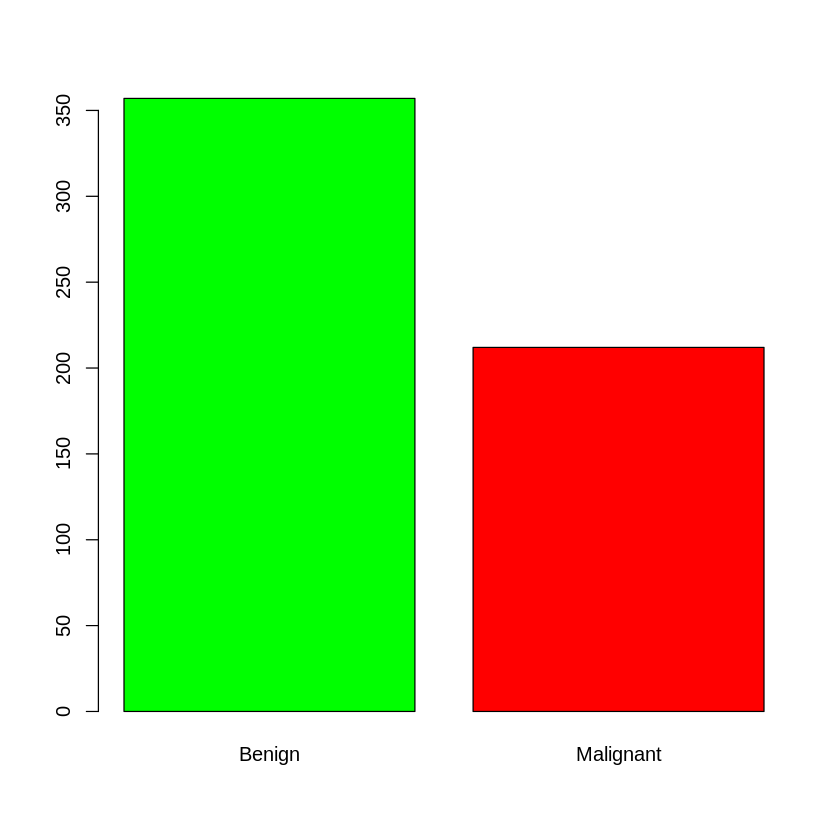

In [47]:
pie(t)#Pie plot
barplot(t,col = c('green','red')) #plotting a bargraph of two categories benign, malignant

# Correaltion of the Matrix

In [48]:
#Correlation between the features
cor(data$radius_mean, data$radius_se)


[1] 0.6790904

In [49]:
aggregate(data$radius_mean ~ diagnosis,summary,data = data)


diagnosis,data$radius_mean
<fct>,"<dbl[,6]>"
Benign,"6.981, 11.080, 12.200, 12.14652, 13.37, 17.85"
Malignant,"10.950, 15.075, 17.325, 17.46283, 19.59, 28.11"


In [50]:
sapply(data, class)

diagnosis             radius_mean            texture_mean 
               "factor"               "numeric"               "numeric" 
         perimeter_mean               area_mean         smoothness_mean 
              "numeric"               "numeric"               "numeric" 
       compactness_mean          concavity_mean     concave.points_mean 
              "numeric"               "numeric"               "numeric" 
          symmetry_mean  fractal_dimension_mean               radius_se 
              "numeric"               "numeric"               "numeric" 
             texture_se            perimeter_se                 area_se 
              "numeric"               "numeric"               "numeric" 
          smoothness_se          compactness_se            concavity_se 
              "numeric"               "numeric"               "numeric" 
      concave.points_se             symmetry_se    fractal_dimension_se 
              "numeric"               "numeric"               "numeric" 
           radius_worst           texture_worst         perimeter_worst 
              "numeric"               "numeric"               "numeric" 
             area_worst        smoothness_worst       compactness_worst 
              "numeric"               "numeric"               "numeric" 
        concavity_worst    concave.points_worst          symmetry_worst 
              "numeric"               "numeric"               "numeric" 
fractal_dimension_worst 
              "numeric"

Let’s check for correlations. For an anlysis to be robust it is good to remove mutlicollinearity ( remove highly correlated predictors)

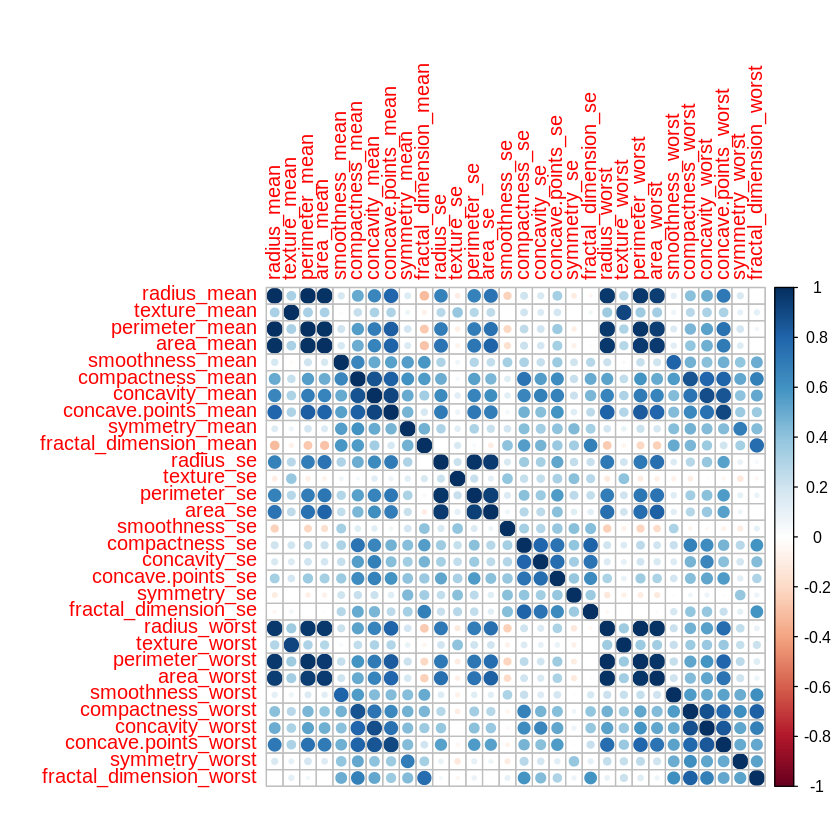

In [51]:
library(corrplot)
corr<- cor(data[,c(2:31)])
corrplot(corr, method="circle")

**Conclusion from the plot:** 
            The highest correlations are between:perimeter_mean and radius_worst; area_worst and radius_worst; perimeter_worst and radius_worst, perimeter_mean, area_worst, area_mean, radius_mean; texture_mean and texture_worst.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



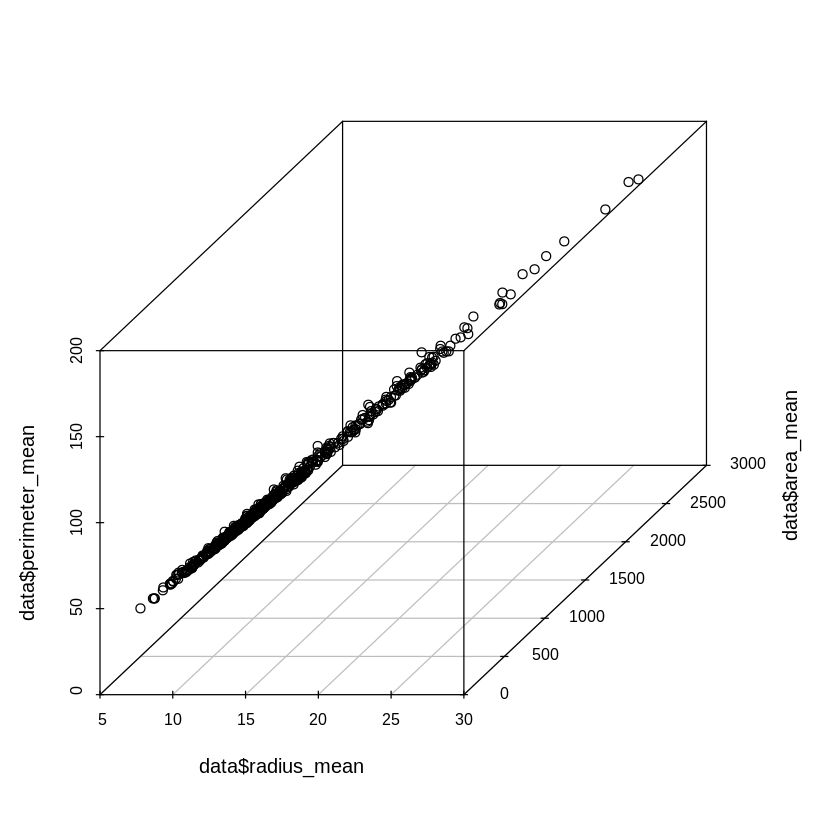

In [52]:
install.packages("scatterplot3d")
library(scatterplot3d)
scatterplot3d(data$radius_mean,data$area_mean,data$perimeter_mean)#Plotting 3D scatterplot 

#Analyzing correlation between variables

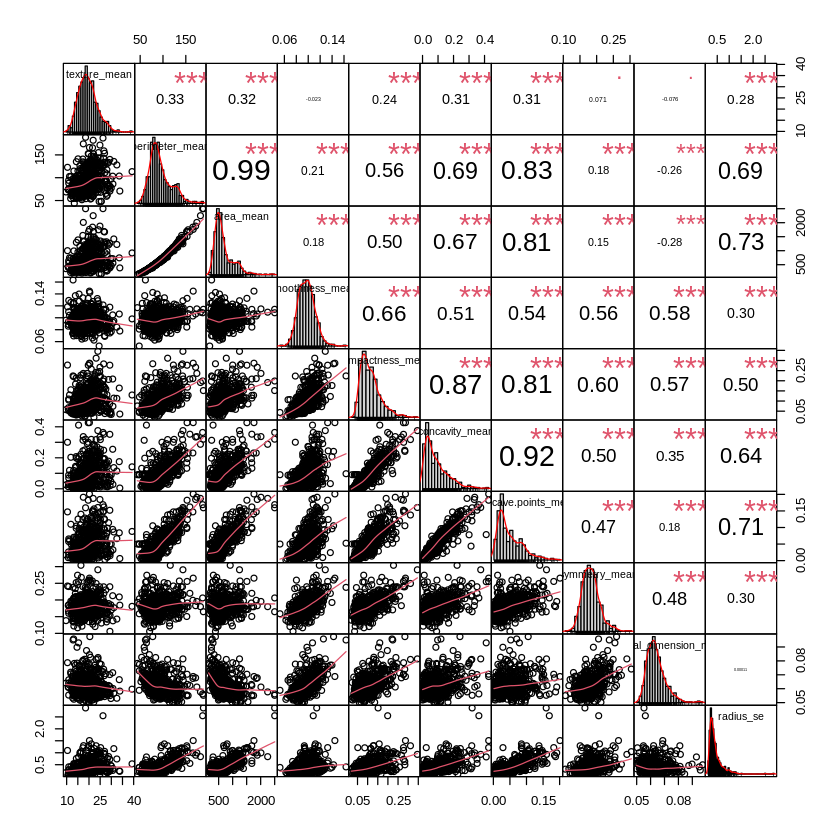

In [53]:
library(PerformanceAnalytics)
#Mean
chart.Correlation(data[,c(3:12)],histogram=TRUE, col="grey10", pch=1, main="Data Mean")


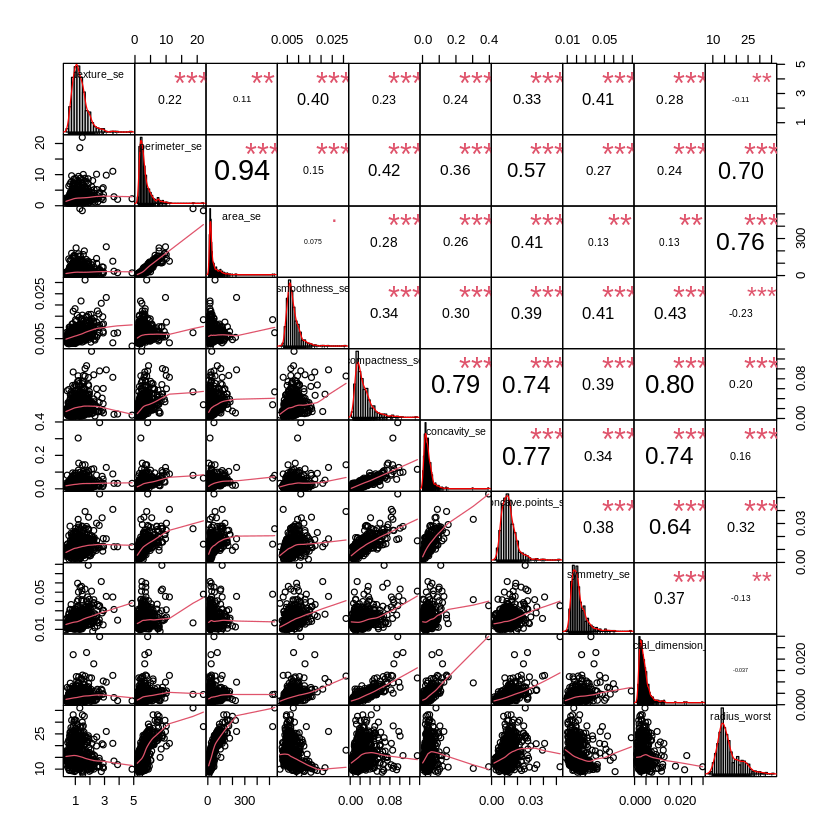

In [54]:
#Standard Error
chart.Correlation(data[,c(13:22)],histogram=TRUE, col="grey10", pch=1, main="Data SE")


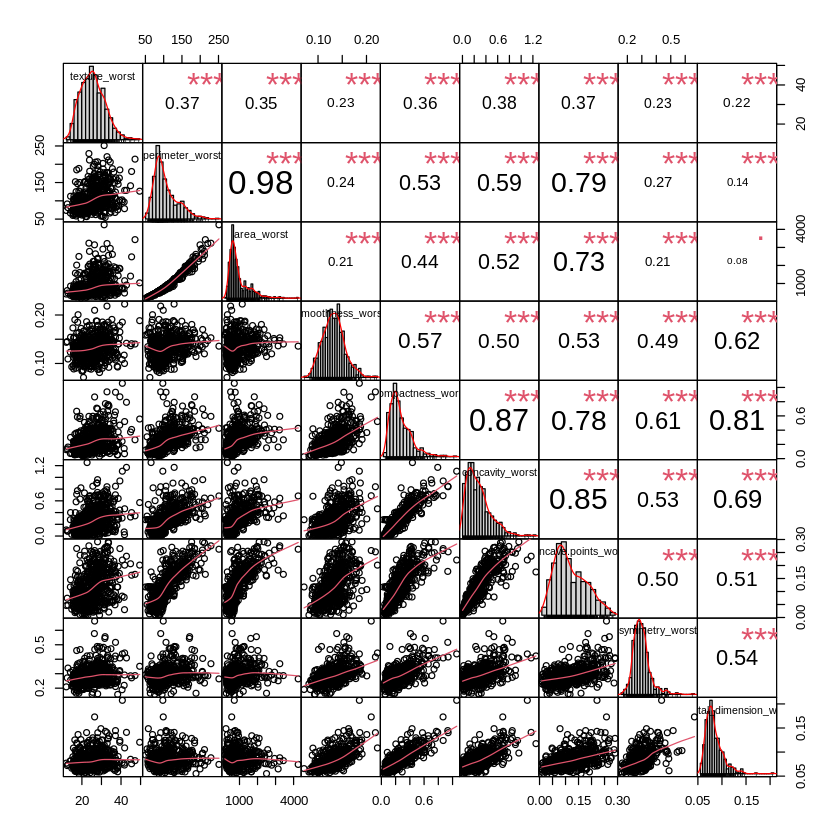

In [55]:
#Worst
chart.Correlation(data[,c(23:31)],histogram=TRUE, col="grey10", pch=1, main="Data Worst")

#Building ML Algorithms

In [56]:
#Division of training and testing data
set.seed(2412) #function sets the starting number used to generate a sequence of random numbers.
               #It ensures that you get the same result if you start with that same seed each time you run the same process. 
ind <- sample(2, nrow(data), replace = TRUE, prob = c(0.7,0.3)) ##Randomly selecting 70% of the data for training and 30% for testing.
trainData <- data[ind==1,]
testData <- data[ind==2,]

#Check Probability of benign and malignant cases in both datasets

In [57]:
#Train dataset
prop.table(table(trainData$diagnosis)) #Probability Value of trainData


   Benign Malignant 
0.6167513 0.3832487 

In [58]:
#Test dataset
prop.table(table(testData$diagnosis)) #Probability Value of testData


   Benign Malignant 
0.6514286 0.3485714 

# **1. Random Forest**

In [59]:
library(randomForest)
library(caret)

In [60]:
rf <- randomForest(diagnosis~.,data=trainData,ntree = 100,proximity = TRUE) #Model
rf



Call:
 randomForest(formula = diagnosis ~ ., data = trainData, ntree = 100,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 4.57%
Confusion matrix:
          Benign Malignant class.error
Benign       235         8  0.03292181
Malignant     10       141  0.06622517

In [61]:
predTrain <- predict(rf, trainData, type = "class") #Predicting the Train data
table(predTrain, trainData$diagnosis)

           
predTrain   Benign Malignant
  Benign       243         0
  Malignant      0       151

In [62]:
predValid <- predict(rf, testData, type = "class") #Predicting the Test data
predValid

3        11        14        18        29        30        32        39 
Malignant Malignant Malignant Malignant Malignant Malignant Malignant Malignant 
       42        46        47        49        52        54        58        60 
   Benign Malignant    Benign    Benign    Benign Malignant Malignant    Benign 
       66        69        70        79        81        83        86        88 
Malignant    Benign    Benign Malignant    Benign Malignant Malignant Malignant 
       95        97       100       106       109       111       117       118 
Malignant    Benign Malignant Malignant Malignant    Benign    Benign Malignant 
      119       120       123       124       125       126       128       133 
Malignant Malignant Malignant    Benign    Benign    Benign Malignant Malignant 
      134       141       142       149       150       153       154       156 
Malignant    Benign Malignant    Benign    Benign    Benign    Benign    Benign 
      157       159       160       165       177       179       184       186 
Malignant    Benign    Benign Malignant    Benign    Benign    Benign    Benign 
      190       192       194       198       199       203       205       206 
   Benign    Benign    Benign Malignant Malignant Malignant    Benign Malignant 
      211       214       216       218       226       230       241       244 
Malignant Malignant Malignant    Benign    Benign Malignant    Benign    Benign 
      246       247       248       250       267       268       277       288 
   Benign    Benign    Benign    Benign    Benign    Benign    Benign    Benign 
      289       292       293       294       295       296       300       302 
   Benign    Benign    Benign    Benign    Benign    Benign    Benign    Benign 
      309       310       311       312       315       317       318       321 
   Benign    Benign    Benign    Benign    Benign    Benign Malignant    Benign 
      324       333       335       336       340       343       345       348 
Malignant    Benign    Benign Malignant Malignant    Benign    Benign    Benign 
      356       360       364       366       367       373       376       381 
   Benign    Benign Malignant Malignant Malignant Malignant Malignant    Benign 
      382       384       386       389       392       397       401       402 
   Benign    Benign    Benign    Benign    Benign    Benign Malignant    Benign 
      403       407       411       412       421       438       446       447 
   Benign Malignant    Benign    Benign    Benign    Benign    Benign Malignant 
      451       453       456       458       461       462       464       466 
   Benign    Benign    Benign    Benign Malignant Malignant    Benign    Benign 
      468       471       472       474       477       481       487       490 
   Benign    Benign    Benign    Benign    Benign    Benign    Benign Malignant 
      491       492       494       495       497       499       501       502 
   Benign Malignant    Benign    Benign    Benign Malignant    Benign Malignant 
      507       511       518       522       523       524       526       532 
   Benign    Benign Malignant Malignant    Benign    Benign    Benign    Benign 
      533       534       539       543       545       548       549       551 
   Benign Malignant    Benign    Benign    Benign    Benign    Benign    Benign 
      552       555       556       563       564       566       568 
   Benign    Benign    Benign Malignant Malignant Malignant Malignant 
Levels: Benign Malignant

In [63]:
mean(predValid == testData$diagnosis)   #Finding the Mean                 
table(predValid,testData$diagnosis) 

[1] 0.9542857

           
predValid   Benign Malignant
  Benign       109         3
  Malignant      5        58

using cross validation

In [64]:
library('e1071')
trControl <- trainControl(method = "cv",
                          number = 10,
                          search = "grid") 
#method = "cv": The method used to resample the dataset.
#number = n: Number of folders to create
#search = "grid": Use the search grid method. For randomized method, use "grid"


In [65]:
set.seed(1234)
rf_default <- train(diagnosis~.,
                    data = trainData,
                    method = "rf",
                    metric = "Accuracy",
                    trControl = trControl)

Random Forest 

394 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 355, 355, 354, 354, 354, 355, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9618590  0.9186196
  16    0.9567308  0.9086058
  30    0.9467308  0.8879164

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


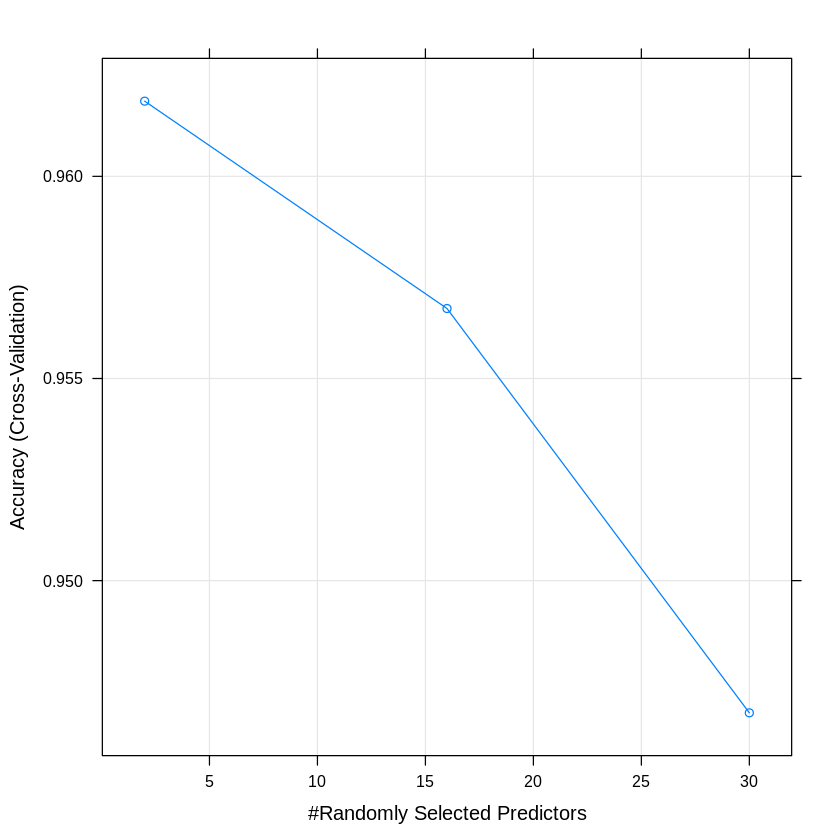

In [66]:
# Print the results
print(rf_default) 
plot(rf_default)

In [67]:
#Printing the results
print(rf)



Call:
 randomForest(formula = diagnosis ~ ., data = trainData, ntree = 100,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 4.57%
Confusion matrix:
          Benign Malignant class.error
Benign       235         8  0.03292181
Malignant     10       141  0.06622517


In [68]:
attributes(rf)


$names
 [1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

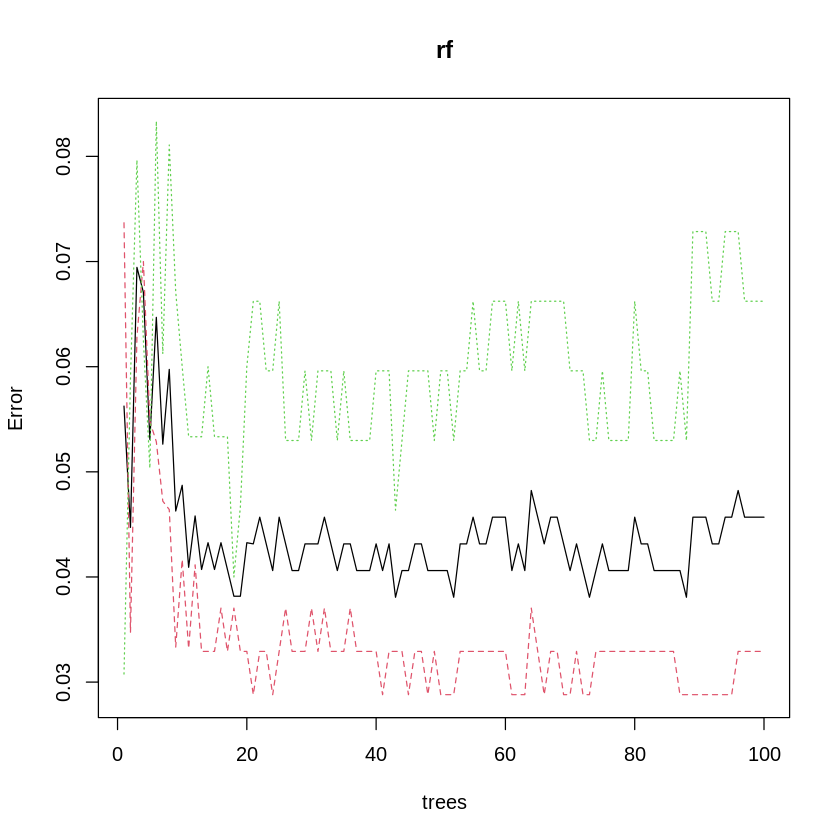

In [69]:
plot(rf)  


In [70]:
importance(rf)


,MeanDecreaseGini
radius_mean,6.3969392
texture_mean,2.5516303
perimeter_mean,9.4564299
area_mean,9.5553940
smoothness_mean,1.0887588
compactness_mean,0.8150666
concavity_mean,7.5776852
concave.points_mean,14.0626907
symmetry_mean,0.4911262
fractal_dimension_mean,0.8450511


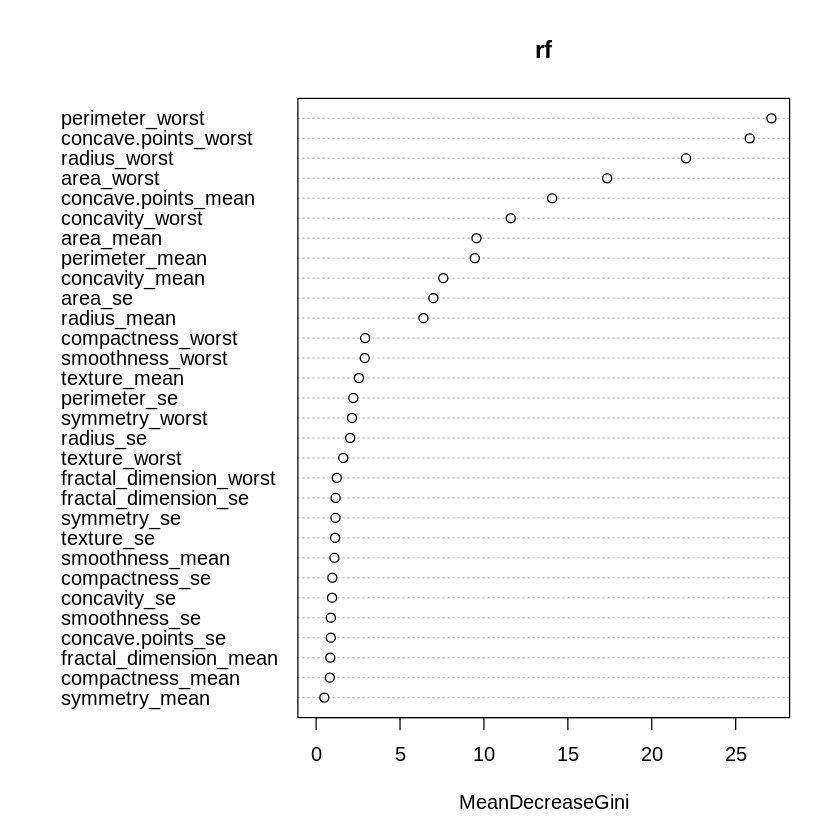

In [71]:
#Variance Importance Plot
varImpPlot(rf)

In [72]:
prediction <- predict(rf,newdata = testData) #Prediction on test data
table(prediction,testData$diagnosis) #Confusion Matrix

           
prediction  Benign Malignant
  Benign       109         3
  Malignant      5        58

In [73]:
rf_CM = confusionMatrix(prediction,testData$diagnosis) #confusion Matrix with accuracy scores
rf_CM

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign       109         3
  Malignant      5        58
                                          
               Accuracy : 0.9543          
                 95% CI : (0.9119, 0.9801)
    No Information Rate : 0.6514          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9001          
                                          
 Mcnemar's Test P-Value : 0.7237          
                                          
            Sensitivity : 0.9561          
            Specificity : 0.9508          
         Pos Pred Value : 0.9732          
         Neg Pred Value : 0.9206          
             Prevalence : 0.6514          
         Detection Rate : 0.6229          
   Detection Prevalence : 0.6400          
      Balanced Accuracy : 0.9535          
                                          
       'Positive' Class : Benign          

# **2. Decision Tree**

In [74]:
library(party)
myFormula <- diagnosis ~ radius_mean + texture_mean + radius_se + texture_se #Formula 
diagnosis_ctree <- ctree(myFormula,data=trainData) #model
table(predict(diagnosis_ctree), trainData$diagnosis)

           
            Benign Malignant
  Benign       220        13
  Malignant     23       138

In [75]:
print(diagnosis_ctree)


	 Conditional inference tree with 6 terminal nodes

Response:  diagnosis 
Inputs:  radius_mean, texture_mean, radius_se, texture_se 
Number of observations:  394 

1) radius_mean <= 15; criterion = 1, statistic = 209.138
  2) radius_mean <= 13.15; criterion = 1, statistic = 27.102
    3)*  weights = 184 
  2) radius_mean > 13.15
    4) texture_mean <= 19.6; criterion = 0.999, statistic = 14.224
      5) radius_se <= 0.2713; criterion = 0.995, statistic = 10.433
        6)*  weights = 29 
      5) radius_se > 0.2713
        7)*  weights = 20 
    4) texture_mean > 19.6
      8)*  weights = 42 
1) radius_mean > 15
  9) texture_mean <= 16.39; criterion = 0.999, statistic = 13.408
    10)*  weights = 12 
  9) texture_mean > 16.39
    11)*  weights = 107 


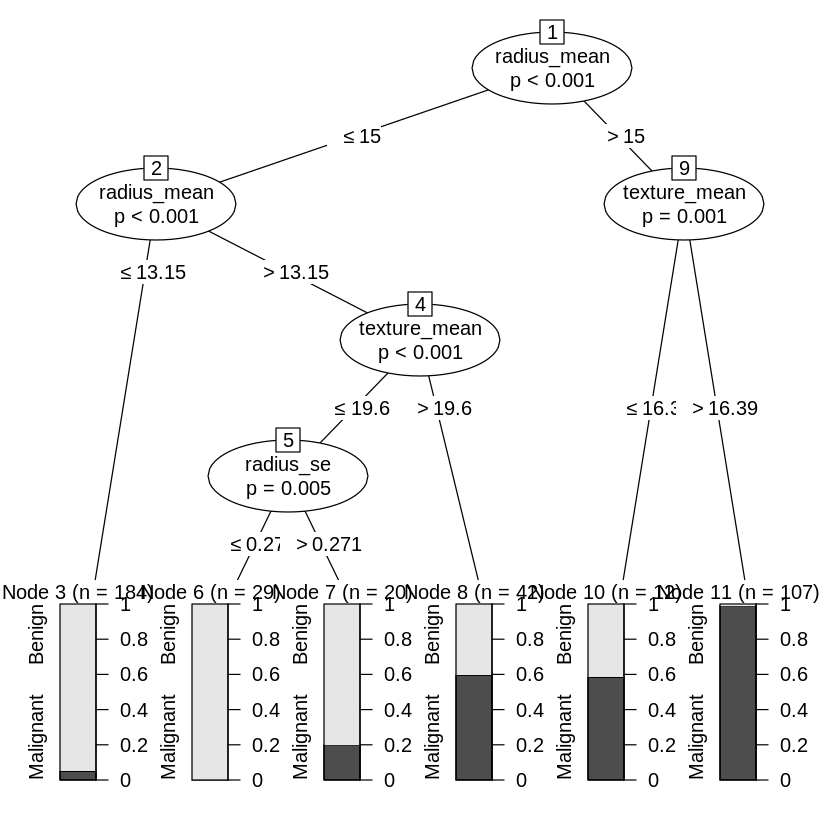

In [76]:
plot(diagnosis_ctree) #plot of DT

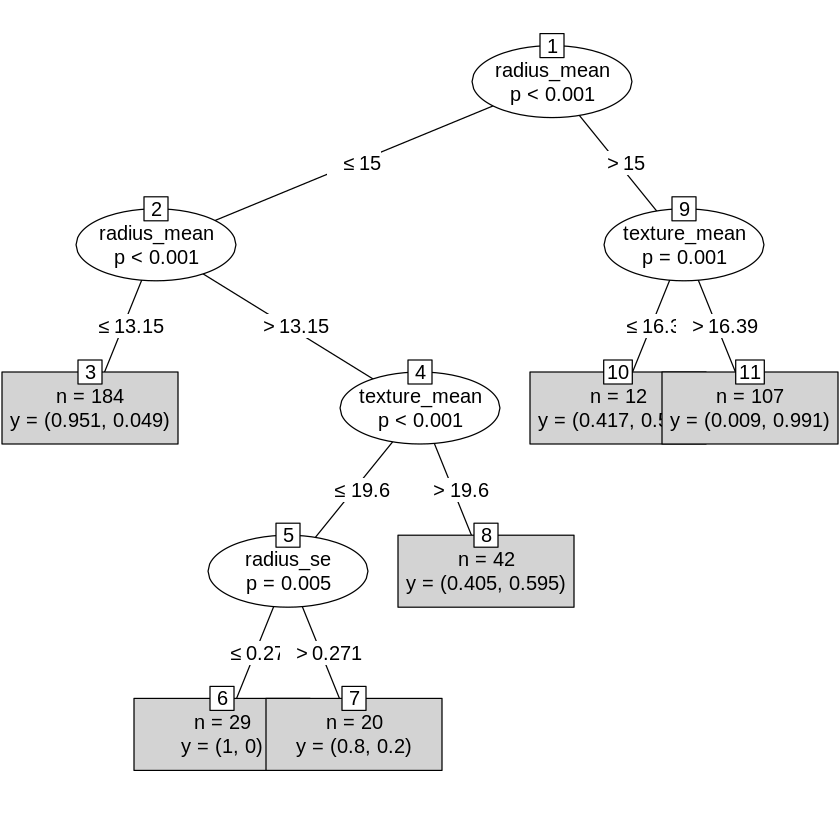

In [77]:
plot(diagnosis_ctree,type='simple') #Plot Simple 


In [78]:
testpredict <- predict(diagnosis_ctree, newdata = testData) #prediction on Test Data
table(testpredict,testData$diagnosis) #Confusion Matrix

           
testpredict Benign Malignant
  Benign        99         7
  Malignant     15        54

In [79]:
DT_CM = confusionMatrix(testpredict,testData$diagnosis) #confusion Matrix with accuracy scores
DT_CM

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign        99         7
  Malignant     15        54
                                          
               Accuracy : 0.8743          
                 95% CI : (0.8159, 0.9195)
    No Information Rate : 0.6514          
    P-Value [Acc > NIR] : 1.914e-11       
                                          
                  Kappa : 0.7314          
                                          
 Mcnemar's Test P-Value : 0.1356          
                                          
            Sensitivity : 0.8684          
            Specificity : 0.8852          
         Pos Pred Value : 0.9340          
         Neg Pred Value : 0.7826          
             Prevalence : 0.6514          
         Detection Rate : 0.5657          
   Detection Prevalence : 0.6057          
      Balanced Accuracy : 0.8768          
                                          
       'Positive' Class : Benign          

# **3. Kmeans**

In [80]:
data2 <- data
data2$diagnosis <- NULL

In [81]:
(kmeans.result <- kmeans(data2, 2)) #Result of Kmeans

K-means clustering with 2 clusters of sizes 438, 131

Cluster means:
  radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1    12.55630     18.57037       81.12347  496.0619       0.0948845
2    19.37992     21.69458      128.23130 1185.9298       0.1012946
  compactness_mean concavity_mean concave.points_mean symmetry_mean
1       0.09109982     0.06513498          0.03491843     0.1780580
2       0.14861298     0.17693947          0.10069878     0.1915397
  fractal_dimension_mean radius_se texture_se perimeter_se  area_se
1             0.06345402 0.3041909   1.215153     2.152881 23.78529
2             0.06060290 0.7428038   1.222538     5.250580 95.67817
  smoothness_se compactness_se concavity_se concave.points_se symmetry_se
1   0.007173263     0.02347469   0.02971426        0.01099462  0.02061358
2   0.006598687     0.03217669   0.04241977        0.01567398  0.02030397
  fractal_dimension_se radius_worst texture_worst perimeter_worst area_worst
1          0.0037475

           
              1   2
  Benign    356   1
  Malignant  82 130

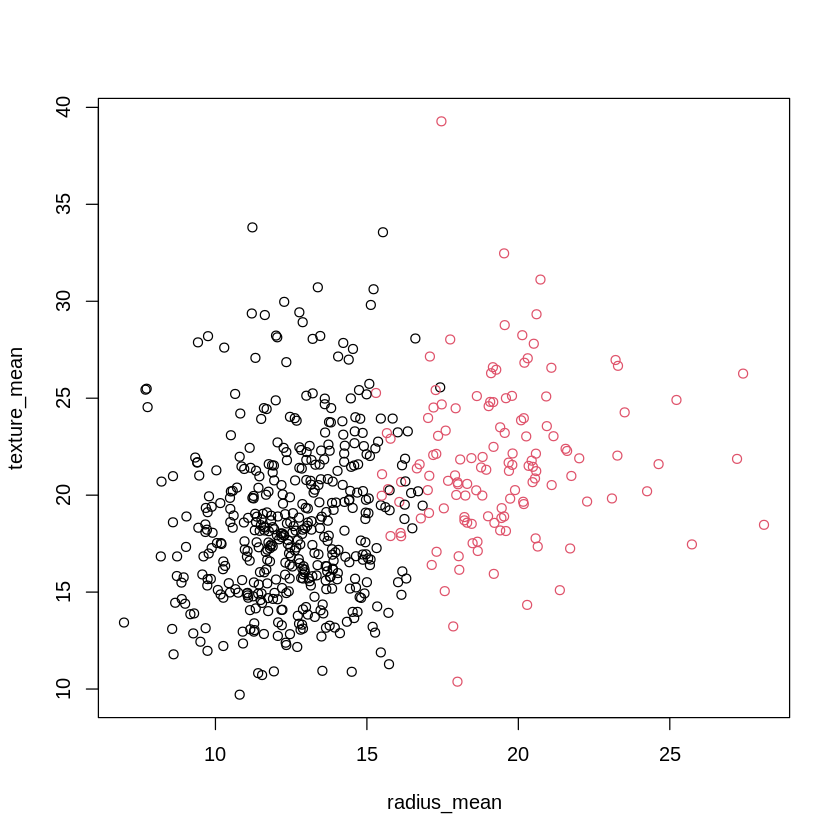

In [82]:
table(data$diagnosis, kmeans.result$cluster) #Confusion Matrix
plot(data2[c("radius_mean", "texture_mean")], col = kmeans.result$cluster) #plot for Kmeans

# **4. SVM**

In [83]:
library(e1071)
svmodel = svm(diagnosis~.,data=trainData,kernel ="linear", cost = 0.1, scale=F) #Model 
svmodel
svmpred = predict(svmodel,testData) #prediction on test Data



Call:
svm(formula = diagnosis ~ ., data = trainData, kernel = "linear", 
    cost = 0.1, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  44


In [84]:
svm_CM = confusionMatrix(svmpred,testData$diagnosis) #confusion Matrix with Accuracy scores
svm_CM

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign       111         6
  Malignant      3        55
                                          
               Accuracy : 0.9486          
                 95% CI : (0.9046, 0.9762)
    No Information Rate : 0.6514          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8854          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9737          
            Specificity : 0.9016          
         Pos Pred Value : 0.9487          
         Neg Pred Value : 0.9483          
             Prevalence : 0.6514          
         Detection Rate : 0.6343          
   Detection Prevalence : 0.6686          
      Balanced Accuracy : 0.9377          
                                          
       'Positive' Class : Benign          

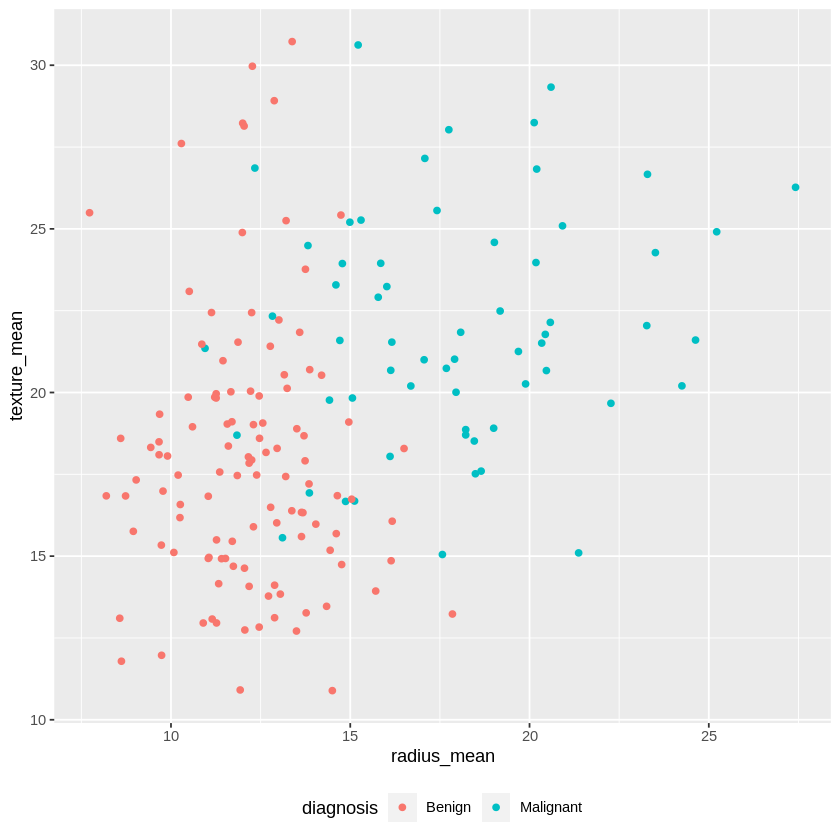

In [85]:
f = ggplot(testData, aes( radius_mean ,texture_mean, colour = diagnosis))
f + geom_jitter() + scale_colour_hue() + theme(legend.position = "bottom")

# **SVM Tuned with hyperparameter**

In [86]:
library(e1071)
gamma = seq(0,0.1,0.005)
cost = 2^(0:5)
param = expand.grid(cost=cost, gamma=gamma)    
acc = numeric()
acc1 = NULL; acc2 = NULL

In [87]:
for(i in 1:NROW(param)){        
  svmodel2 = svm(diagnosis~., data=trainData, gamma=param$gamma[i], cost=param$cost[i])
  svm_pred2 = predict(svmodel2, testData)
  acc1 = confusionMatrix(svm_pred2, testData$diagnosis)
  acc2[i] = acc1$overall[1]
} #Model Building 


In [88]:
acc_list = data.frame(p= seq(1,NROW(param)), accuracy = acc2) #Accuracy 
acc_list

p,accuracy
<int>,<dbl>
1,0.6514286
2,0.6514286
3,0.6514286
4,0.6514286
5,0.6514286
6,0.6514286
7,0.9657143
8,0.9771429
9,0.9657143


In [89]:
tune_p = subset(acc_list, accuracy==max(accuracy))[1,] #Tuning
subs = paste("Optimal cost =", param$cost[tune_p$p],"and optimal gamma =", param$gamma[tune_p$p], "(Accuracy :", round(tune_p$accuracy,4),") in SVM")
subs #Optimal cost,optimal gamma and accuracy in SVM

[1] "Optimal cost = 1 and optimal gamma = 0.035 (Accuracy : 0.9886 ) in SVM"

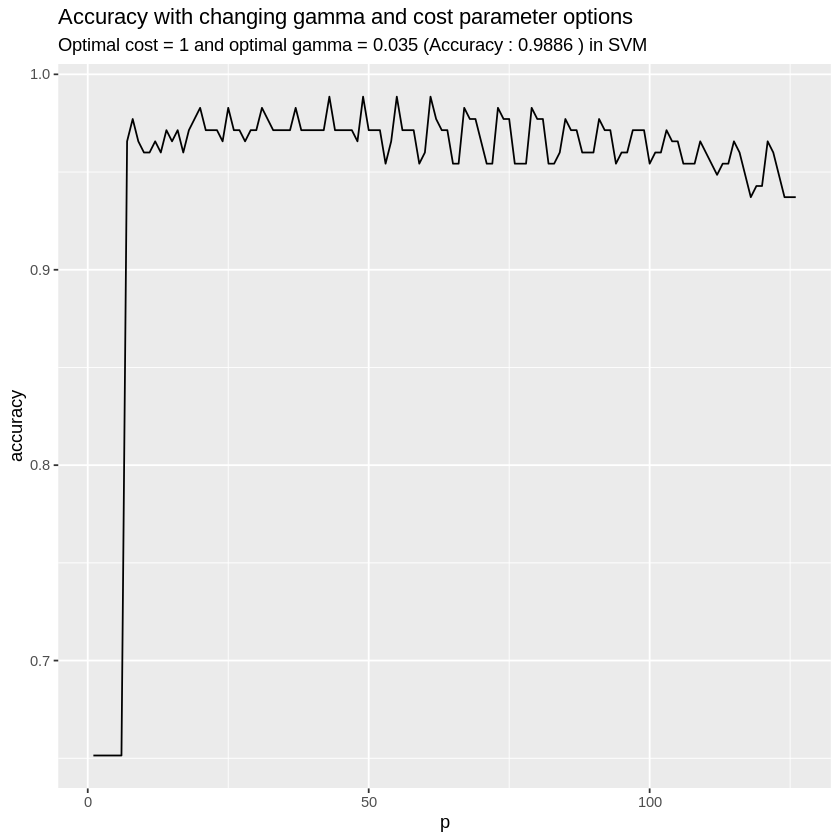

In [90]:
library(ggplot2)
ggplot(acc_list, aes(x=p,y= accuracy)) +
  geom_line()+labs(title = "Accuracy with changing gamma and cost parameter options", subtitle = subs)

In [91]:
svm_tune = svm(diagnosis~., data=trainData, cost=param$cost[tune_p$p], gamma=param$gamma[tune_p$p]) #Tuning on TrainData
svm_tunepred = predict(svm_tune, testData) #Predicting on TestData
svm_CMtune = confusionMatrix(svm_tunepred, testData$diagnosis) #Confusion Matrix and Accuracy Score 
svm_CMtune

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign       112         0
  Malignant      2        61
                                          
               Accuracy : 0.9886          
                 95% CI : (0.9593, 0.9986)
    No Information Rate : 0.6514          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.975           
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9825          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9683          
             Prevalence : 0.6514          
         Detection Rate : 0.6400          
   Detection Prevalence : 0.6400          
      Balanced Accuracy : 0.9912          
                                          
       'Positive' Class : Benign          

# **Compairing Accuracies**

In [92]:
model_cmp = data.frame(Model = c("Random Forest","Decision Tree","SVM","SVM Tuned"), Accuracy = c(rf_CM$overall[1],DT_CM$overall[1],
                                                                                                  svm_CM$overall[1],svm_CMtune$overall[1]))

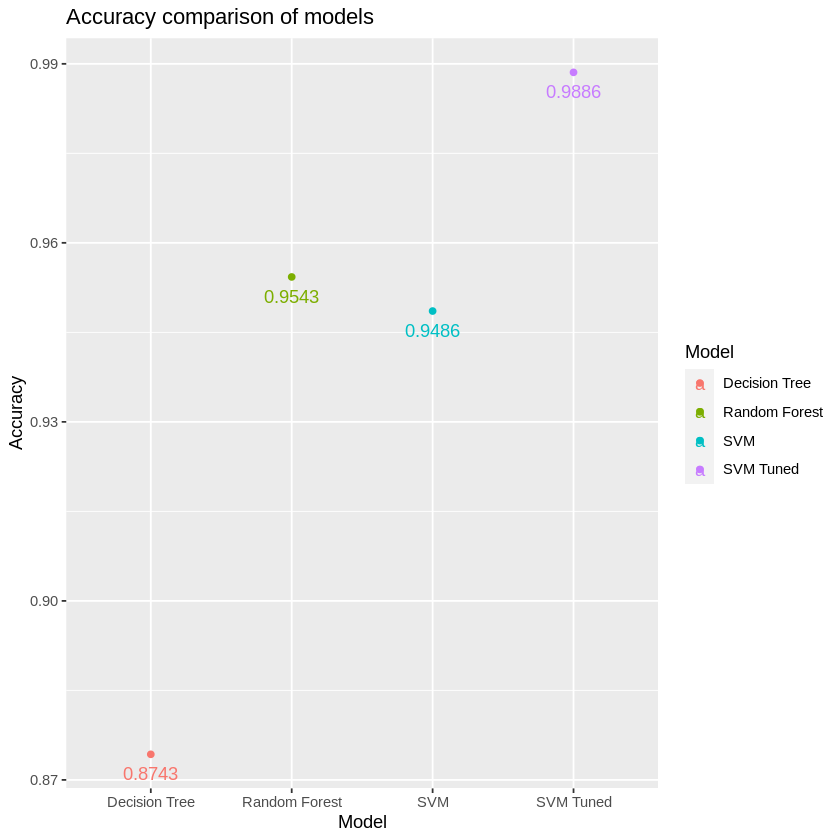

In [93]:
library(ggplot2) #Visualizing the Accuracy of Different models .
ggplot(model_cmp, aes(x=Model,y= Accuracy,color= Model, label= Accuracy)) +
  geom_point()+labs(title = "Accuracy comparison of models")+ geom_text(aes(label= round(Accuracy,4)),vjust=2)

**#In Conclusion:**
         For the given dataset the Machine Learning model with high accuracy for SVM Tuned Model.